In [1]:
# HOW TO GET A PREDICTION FROM A TRAINED MODEL

In [2]:
### STEP 0 - IMPORTS
from keras.models import load_model
from keras.preprocessing import image
import cv2
from matplotlib import pyplot as plt
import numpy as np
import glob

Using TensorFlow backend.
/home/apps/anaconda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/apps/anaconda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/apps/anaconda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/apps/anaconda/lib/python3.6/site-packages/tensorflow/python

In [3]:
# prevent keras from using the whole GPU
from keras.backend.tensorflow_backend import set_session
import tensorflow as tf
config = tf.ConfigProto()
config.gpu_options.allow_growth = True  # dynamically grow the memory used on the GPU
config.log_device_placement = True  # to log device placement (on which device the operation ran)

sess = tf.Session(config=config)
set_session(sess)  # set this TensorFlow session as the default session for Keras

In [4]:
### Step 0.1
# this is the dictionary created at training time that associates a class with an in the output vector of the model
class_indices = {'A': 0,
 'B': 1,
 'C': 2,
 'D': 3,
 'E': 4,
 'F': 5,
 'G': 6,
 'H': 7,
 'I': 8,
 'J': 9,
 'K': 10,
 'L': 11,
 'M': 12,
 'N': 13,
 'O': 14,
 'P': 15,
 'Q': 16,
 'R': 17,
 'S': 18,
 'T': 19,
 'U': 20,
 'V': 21,
 'W': 22,
 'X': 23,
 'Y': 24,
 'Z': 25,
 'del': 26,
 'nothing': 27,
 'space': 28}

# this dictionary inverts the one above: ie gives you the class from the index
# used to get the letter class from the argmax of a prediction vector.
ind_to_class = {v: k for k, v in class_indices.items()}

# approximate data mean and variance, computed on subset of training data
(R_MEAN, G_MEAN, B_MEAN) = (132.54925778832765,127.47777489388343,131.40493902829613)
(R_VAR, G_VAR, B_VAR) = (57.8223931610762,64.89711912659384,66.70657380138726)

In [5]:
### STEP 1 - LOAD THE MODEL AND ITS WEIGHTS
# path to model definition (replace with your own PATH)
MODEL_DIR = '/YOUR_PATH/asl-alphabet/models'

# list all the available models
g = sorted(glob.glob(MODEL_DIR+'/*archi.h5'))
for n,f in enumerate(g):
    print(n, f)

0 /scratch/felix/data/asl-alphabet/models/slim-cnn-model_1589435564.024641.archi.h5
1 /scratch/felix/data/asl-alphabet/models/slim-cnn-model_1589466843.9716654.archi.h5
2 /scratch/felix/data/asl-alphabet/models/slim-cnn-model_1589468465.7909756.archi.h5
3 /scratch/felix/data/asl-alphabet/models/slim-cnn-model_1589476500.7791066.archi.h5
4 /scratch/felix/data/asl-alphabet/models/slim-cnn-model_1589481921.2333355.archi.h5
5 /scratch/felix/data/asl-alphabet/models/slim-cnn-model_1589483453.5800693.archi.h5
6 /scratch/felix/data/asl-alphabet/models/slim-cnn-model_1589484159.8331006.archi.h5
7 /scratch/felix/data/asl-alphabet/models/slim-cnn-model_1589484700.6529548.archi.h5
8 /scratch/felix/data/asl-alphabet/models/slim-cnn-model_1589485062.7551541.archi.h5
9 /scratch/felix/data/asl-alphabet/models/slim-cnn-model_1589485392.4361136.archi.h5
10 /scratch/felix/data/asl-alphabet/models/slim-cnn-model_1589487064.7397249.archi.h5
11 /scratch/felix/data/asl-alphabet/models/slim-cnn-model_1589487

In [6]:
# pick one, or put the path to your own 
model_archi_path = g[-1]

In [7]:
# load the model architecture
model = load_model(model_archi_path)
# check model summary
print(model.summary())

# path to model weights (relies on the naming convention. ie that the file ends with 'archi.h5')
# if you want to have different naming convention, you need to change the path to weights
model_weights_path = model_archi_path[:-len('archi.h5')]+'weights.h5'
# load weights
model.load_weights(model_weights_path)

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 64, 64, 3)    0                                            
__________________________________________________________________________________________________
gaussian_noise_1 (GaussianNoise (None, 64, 64, 3)    0           input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 64, 64, 32)   896         gaussian_noise_1[0][0]           
__________________________________________________________________________________________________
leaky_re_lu_1 (LeakyReLU)       (None, 64, 64, 32)   0           conv2d_1[0][0]                   
____________________________________________________________________________________________

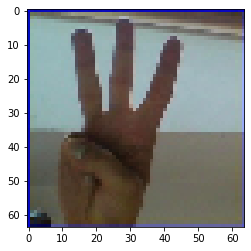

In [8]:
# STEP 1.5 - load an image from disk
# path to an image 
# IMG_DIR = '/scratch/felix/data/asl-alphabet/asl_alphabet_train/asl_alphabet_train/'
# img_path = IMG_DIR + 'C/C310.jpg'
IMG_DIR = '/YOUR_PATH/asl-alphabet/asl_alphabet_test/asl_alphabet_test/'
img_path = IMG_DIR + 'W_test.jpg'

# load image to python object using keras
img = image.load_img(img_path, target_size=(64,64))
img = image.img_to_array(img, dtype='uint8')
# print(img)
plt.imshow(img)
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


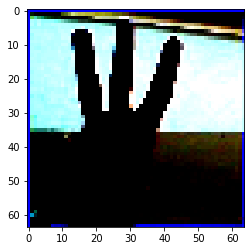

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


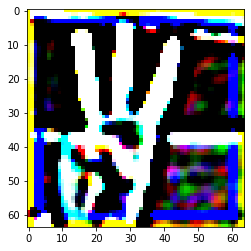

img shape: (64, 64, 3)


In [9]:
### STEP 2 - PREPROCESS IMAGE
# at this stage, img should be a numpy array of shape (64,64,3)
# with values between 0 and 255
# your task is to get this img from the webcam


# normalize to mean 0 variance 1
img = (img-np.mean(img))/np.std(img)
plt.imshow(img)
plt.show()

# apply edge detection transform transform
# img = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=5)
# img = cv2.Sobel(img, cv2.CV_64F, 1, 1, ksize=5)
img = cv2.GaussianBlur(img, (7, 7), 0)
img = cv2.Laplacian(img, cv2.CV_64F, ksize=5)

plt.imshow(img)
plt.show()

# # renormalize?
# img = (img-np.mean(img))/np.std(img) 
# plt.imshow(img)
# plt.show()

# check the shape of img
# it should be (64, 64, 3) (64*64 pixels with 3 colors)
print('img shape: {}'.format(np.shape(img)))
# expand to have a batchsize of 1
img = np.reshape(img, (1,64,64,3))

In [10]:
### STEP 3 - GET A PREDICTION
pred_vector = model.predict(img)
pred_class = ind_to_class[np.argmax(pred_vector)]

# get class of prediction [A,B,C,...,Z,del, nothing]
print('prediction vector: {}'.format(np.round(pred_vector, decimals=2)))
print('file name: {}'.format(img_path.split('/')[-1]))
print('prediction class: {}'.format(ind_to_class[np.argmax(pred_vector)]))


prediction vector: [[0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.   0.   0.   0.   0.   0.01 0.99 0.   0.   0.   0.   0.
  0.  ]]
file name: W_test.jpg
prediction class: W
